In [1]:
%matplotlib inline

In [23]:
import numpy as np 
import pandas as pd 
import simple_twitter_learning as stl
import re
import matplotlib.pyplot as plt

* download data

In [3]:
%%bash

if [ ! -e 'dataset_sentiment.csv' ]
then
    echo "downloading dataset"
    wget https://raw.githubusercontent.com/SmartDataAnalytics/MA-INF-4222-NLP-Lab/master/2018_SoSe/exercises/dataset_sentiment.csv
else
    echo "dataset already downloaded"
fi

dataset already downloaded


* plot function:

In [46]:
def sentiment_score(s):
    #(pos, neg, neu)^T
    return s[0] - s[1]

def plot_sentiment_space(predicted_sentiment_vectors_list, top_sentiments, top_emojis, style=['bo']):
    # sentiment score axis
    top_X = np.array([sentiment_score(x) for x in top_sentiments])
    

    # neutral axis:
    top_Y = np.array([x[2] for x in top_sentiments])
    

    fig_1, ax_1 = plt.subplots(figsize=(15,10))
    plt.title("sentiment-score-plot")
    plt.xlabel("sentiment score")
    plt.ylabel("neutrality")
    plt.xlim([-1,1])
    plt.ylim([0,1])
    for i in range(len(top_X)):
        plt.text(top_X[i], top_Y[i], top_emojis[i])
    for i in range(len(predicted_sentiment_vectors_list)):
        pred_X = np.array([sentiment_score(x) for x in predicted_sentiment_vectors_list[i]])
        pred_Y = np.array([x[2] for x in predicted_sentiment_vectors_list[i]])
        plt.plot(pred_X, pred_Y, style[i], alpha=0.5)
    #plt.savefig("val-error_sentiment-plot" + str(datetime.datetime.now()) +  ".png", bbox_inches='tight')

    # sentiment score axis
    top_X = np.array([x[0] for x in top_sentiments])
    

    # neutral axis:
    top_Y = np.array([x[1] for x in top_sentiments])
    

    fig_2, ax_2 = plt.subplots(figsize=(15,10))
    plt.title("positive-negative-plot")
    plt.xlabel("positive")
    plt.ylabel("negative")
    plt.xlim([0,1])
    plt.ylim([0,1])
    for i in range(len(top_X)):
        plt.text(top_X[i], top_Y[i], top_emojis[i])
    for i in range(len(predicted_sentiment_vectors_list)):
        pred_X = np.array([x[0] for x in predicted_sentiment_vectors_list[i]])
        pred_Y = np.array([x[1] for x in predicted_sentiment_vectors_list[i]])
        plt.plot(pred_X, pred_Y, style[i], alpha=0.5)
    #'plt.savefig("val-error_positive-negative-plot" + str(datetime.datetime.now()) + ".png", bbox_inches='tight')
    plt.show()

* read data:

In [38]:
df = pd.read_csv('dataset_sentiment.csv')
df = df[['text','sentiment']]

In [39]:
df['text'] = df['text'].apply(lambda x: x.lower())
df['text'] = df['text'].apply(lambda x: x.replace('rt',' '))
df['text'] = df['text'].apply((lambda x: re.sub('[^a-zA-Z0-9\s]','',x)))
df.head()

text sentiment
0    nancyleegrahn how did everyone feel about th...   Neutral
1    scottwalker didnt catch the full gopdebate l...  Positive
2    tjmshow no mention of tamir rice and the gop...   Neutral
3    robgeorge that carly fiorina is trending  ho...  Positive
4    danscavino gopdebate w realdonaldtrump deliv...  Positive

In [40]:
neg = np.array([df['sentiment'][i] == 'Negative' for i in range(df.shape[0])])
pos = np.array([df['sentiment'][i] == 'Positive' for i in range(df.shape[0])])
neu = np.array([df['sentiment'][i] == 'Neutral' for i in range(df.shape[0])])

text = np.array(df['text'].tolist())

* load pipeline

In [7]:
pipeline_file = "/home/jonas/Dokumente/NLP_DATA/python_dumps/pipelines/tfidf_final/final_epoch01.pipeline"
pm = stl.pipeline_manager.load_from_pipeline_file(pipeline_file)

* plot statements

In [41]:
top_20 = list("😳😋😀😌😏😔😒😎😢😅😁😉🙌🙏😘😊😩😍😭😂")
top_20_sents = stl.emoji2sent(top_20)

pred_pos = pm.predict(text[pos])
pred_neg = pm.predict(text[neg])
pred_neu = pm.predict(text[neu])

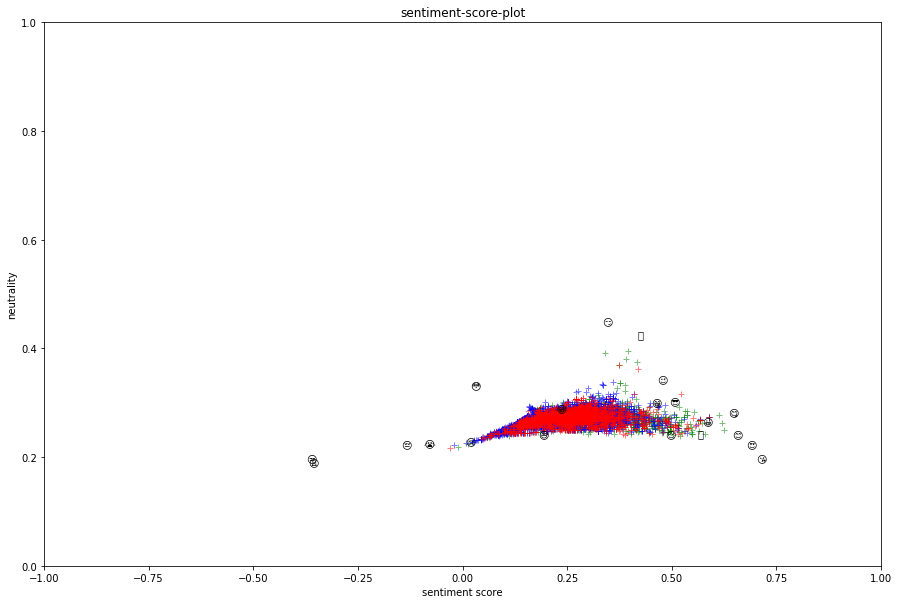

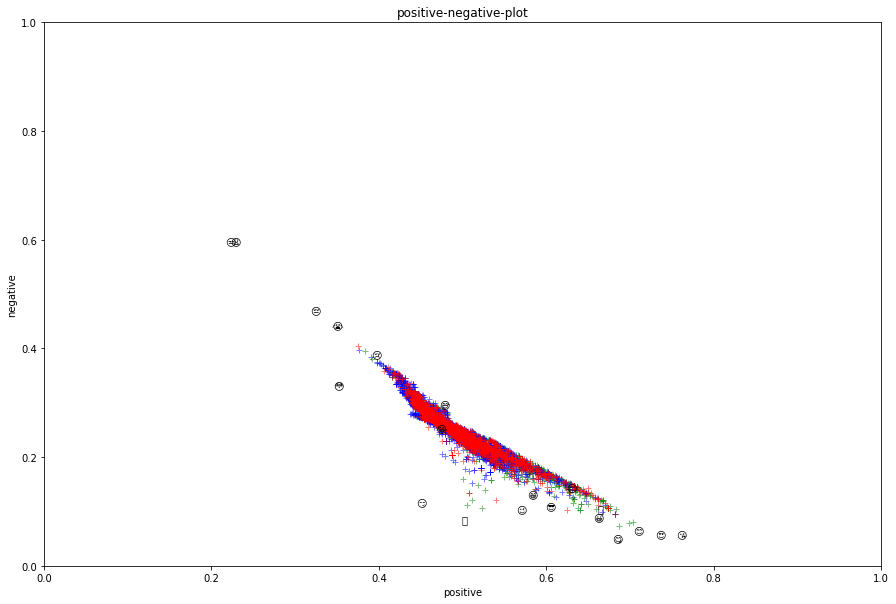

In [47]:
#stl.plot_sentiment_space(predicted_sentiment_vectors=pred_pos, top_sentiments=top_20_sents, top_emojis=top_20, style='go')
#stl.plot_sentiment_space(predicted_sentiment_vectors=pred_neg, top_sentiments=top_20_sents, top_emojis=top_20, style='ro')
#stl.plot_sentiment_space(predicted_sentiment_vectors=pred_neu, top_sentiments=top_20_sents, top_emojis=top_20, style='bo')
plot_sentiment_space(predicted_sentiment_vectors_list=[pred_pos,pred_neg,pred_neu], top_sentiments=top_20_sents, top_emojis=top_20, style=['g+','b+','r+'])

## user labeled sentiment dataset

In [51]:
df = pd.read_csv('../sentiment_sentences.csv', delimiter=';')

In [52]:
neg = np.array([df['sent'][i] == 'n' for i in range(df.shape[0])])
pos = np.array([df['sent'][i] == 'p' for i in range(df.shape[0])])

text = np.array(df['text'].tolist())

pred_pos = pm.predict(text[pos])
pred_neg = pm.predict(text[neg])

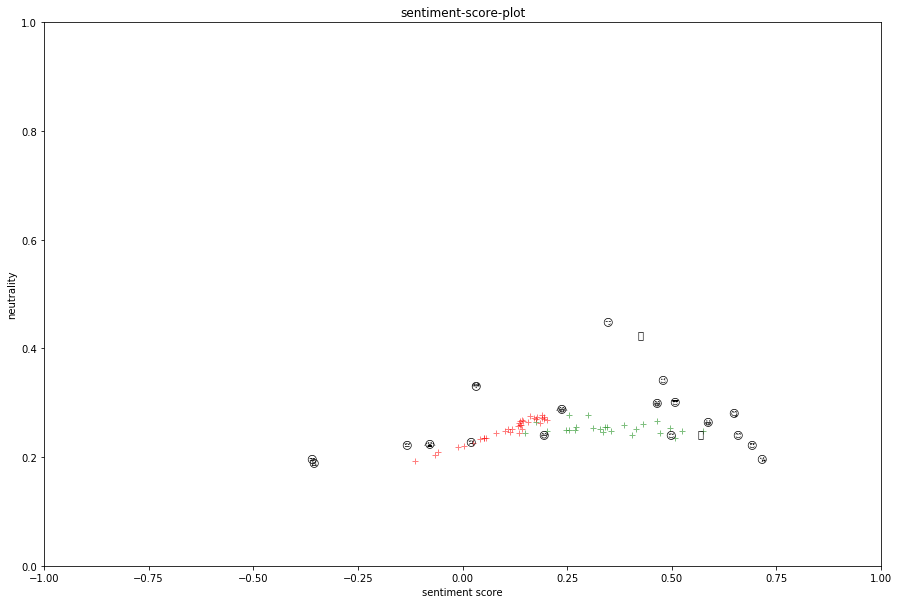

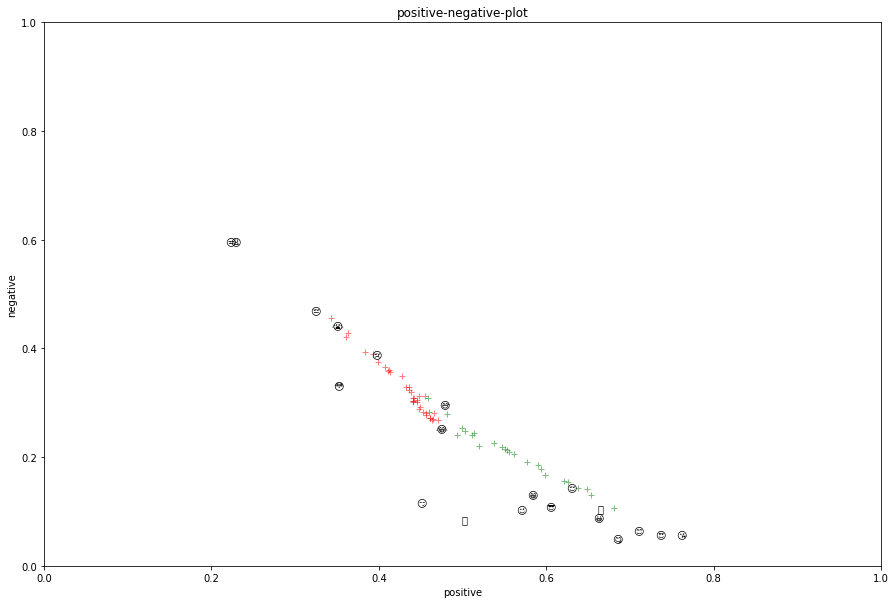

In [53]:
plot_sentiment_space(predicted_sentiment_vectors_list=[pred_pos,pred_neg], top_sentiments=top_20_sents, top_emojis=top_20, style=['g+','r+'])